# MTH4000 Programming in Python I - Lecture 10
Module Organisers: Dr Matthew Lewis and Prof. Thomas Prellberg

<div class="alert alert-block alert-info">
    <b>Note that the module `pandas_datareader` is not installed in the labs (and on appsanywhere) by default.</b>
    
To use `pandas_datareader` in the labs, you will need to run Python in a virtual environment where you can install it explicitly for the session. **Before** executing the command`jupyter notebook` as usual, you need to execute both `virtualenv MTH5001` (the name of the environment does not actually matter) and the command `pip install pandas-datareader` (note the `-` instead of the `_` that is used within Python!). In other words, you will start your session with

```
virtualenv MTH5001
pip install pandas-datareader
jupyter notebook
```
If the code below doesn't work for you (in particular the line `import pandas_datareader.data as web`, chances are you will need to quit your jupyter notebook and restart it as just described.
    
(If you run Python on your own machine, there is normally no need to set up a virtual environment, you can just install missing modules as usual using pip or conda. And if that doesn't mean anything to you, use Google and come ask us for help.)
</div>

### Fundamentals of Pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

Most of the utility of the Pandas module comes from a single type of object, called a *DataFrame*.  These objects are most commonly constructed by importing the data from .csv files.  The following code, for instance, extracts data from a file `UKcountries.csv` and collates it into a Pandas DataFrame.

In [2]:
countries=pd.read_csv('UKcountries.csv')

countries

,Name,Capital,Area (km^2),Population (millions)
0,England,London,130279,56.31
1,Scotland,Edinburgh,77933,5.47
2,Wales,Cardiff,20735,3.15
3,Northern Ireland,Belfast,13562,1.90


The function `read_csv`, which is contained inside the Pandas module, can be used to extract data from any .csv file in your local directory and load the data into a Pandas DataFrame.  However, as we shall see below, there are other methods of obtaining data for DataFrames.

We can use the `type` function to verify that this newly constructed object `countries` is indeed a DataFrame.

In [3]:
type(countries)

pandas.core.frame.DataFrame

We have already seen that the data contained inside lists can be obtained by calling the list at the relevant indices.  Something similar holds for DataFrames, only we now have the ability to call the data with the column headers.

In [4]:
countries['Capital']
# Make sure the column header is called as a string.

0       London
1    Edinburgh
2      Cardiff
3      Belfast
Name: Capital, dtype: object

Note that the data displayed here looks very different from the original DataFrame.  This is because the data contained in a single column is contained inside a more basic one-dimensional array, known as a *Series*.

In [5]:
type(countries['Capital'])

pandas.core.series.Series

DataFrames are essentially collections of related Series, the $n^{th}$ rows of which all pertain to the same data point.

A Series contained within a DataFrame can be obtained by calling the column header.  Pandas also allows us to construct entire DataFrames that are subsets of the original DataFrame.  This is done by calling a list containing the column headers of each Series that we want to be included.

In [6]:
countries[['Name','Population (millions)']]
# The object being called is a list, so we must include two sets of square brackets.

,Name,Population (millions)
0,England,56.31
1,Scotland,5.47
2,Wales,3.15
3,Northern Ireland,1.90


We can even call the DataFrame with a list containing a single entry, from which we receive a DataFrame containing a single Series.

In [7]:
countries[['Capital']]

,Capital
0,London
1,Edinburgh
2,Cardiff
3,Belfast


Now that we've seen how to construct DataFrames that contain only a selection of relevant columns, what about rows?

There are two methods that allow us to return data by specifying both rows and columns.  The first of these is the `.iloc` method, which allows us to specify the indices of the rows and columns from which we wish to receive data.

In [8]:
countries.iloc[[0,2]]

,Name,Capital,Area (km^2),Population (millions)
0,England,London,130279,56.31
2,Wales,Cardiff,20735,3.15


The above example returns data from the $0^{th}$ and $2^{nd}$ rows, and gives the relevant entries from every column.

We can also call a second argument to specify which columns we would like to be included.

In [9]:
countries.iloc[[0,2],[0,1]]

,Name,Capital
0,England,London
2,Wales,Cardiff


There is also the `.loc` method, which does exactly the same thing, but allows us to use the row and column names, instead of the indices.

(Note that in this example, the rows are labelled only with their indices, and so there won't be any difference in the row calls.  The column calls will change however, since the columns are labelled.)

In [10]:
countries.loc[[2,0],['Capital','Name']]

,Capital,Name
2,Cardiff,Wales
0,London,England


The above example shows that the order of the rows and columns does not have to match the order in which they were included in the original DataFrame.

Next we consider the question of editing data inside a DataFrame.  For a list, overwriting an entry is as simple as calling the list at that entry's index and assigning it a new value.  The syntax for overwriting data in a Pandas DataFrame is similar.

Suppose we wish to round the population numbers to one decimal place, the following code calls the `Population (millions)` Series and redefines it to include the contents of the given list.

In [11]:
countries['Population (millions)']=[56.3,5.5,3.2,1.9]

countries

,Name,Capital,Area (km^2),Population (millions)
0,England,London,130279,56.3
1,Scotland,Edinburgh,77933,5.5
2,Wales,Cardiff,20735,3.2
3,Northern Ireland,Belfast,13562,1.9


But what if we had to do that for thousands of entries?  Is there a more efficient way than manually rewriting every single entry?

An important thing to note is that Series objects are iterable:

In [12]:
for i in countries['Population (millions)']:
    print(i)

56.3
5.5
3.2
1.9


Since we can iterate over these objects, we can use them to build list comprehensions.  Suppose now that we wish to round the population numbers to the nearest integer, we can use the built-in `round` function in a list comprehension.

In [13]:
countries['Population (millions)']=[round(i) for i in countries['Population (millions)']]

countries

,Name,Capital,Area (km^2),Population (millions)
0,England,London,130279,56
1,Scotland,Edinburgh,77933,6
2,Wales,Cardiff,20735,3
3,Northern Ireland,Belfast,13562,2


What if we wish to edit an individual entry?  Would we have to reconstruct an entire column?

Thankfully, the `.iloc` and `loc` methods above can be used here too.  The code below calls the entry at the $0^{th}$ row of the `Capital` column, and overwrites it to promote Manchester to the capital city of England.

In [14]:
countries.loc[0,'Capital']

'London'

In [15]:
countries.loc[0,'Capital']='Manchester'

countries

,Name,Capital,Area (km^2),Population (millions)
0,England,Manchester,130279,56
1,Scotland,Edinburgh,77933,6
2,Wales,Cardiff,20735,3
3,Northern Ireland,Belfast,13562,2


We can even use lists to overwrite several entries at once:

In [16]:
countries.loc[[1,2,3],'Capital']=['Glasgow','Swansea','Derry']

countries

,Name,Capital,Area (km^2),Population (millions)
0,England,Manchester,130279,56
1,Scotland,Glasgow,77933,6
2,Wales,Swansea,20735,3
3,Northern Ireland,Derry,13562,2


Pandas also allows us to perform operations directly on an entire Series.  Say, for instance, that we wanted to convert the Area column into units of square miles, this can be done by multiplying through by a factor of $0.386$.

In [17]:
countries['Area (km^2)']*0.386

0    50287.694
1    30082.138
2     8003.710
3     5234.932
Name: Area (km^2), dtype: float64

Suppose that we want to add this data to the DataFrame, this is actually rather straightforward.  To add a new Series to a DataFrame, we can simply call the DataFrame with our new desired column header, and assign it to a list containing the values we wish to have in that column.

In [18]:
countries['Area (miles^2)']=countries['Area (km^2)']*0.386

countries

,Name,Capital,Area (km^2),Population (millions),Area (miles^2)
0,England,Manchester,130279,56,50287.694
1,Scotland,Glasgow,77933,6,30082.138
2,Wales,Swansea,20735,3,8003.710
3,Northern Ireland,Derry,13562,2,5234.932


Finally, just as we loaded the original DataFrame from a .csv file in our local directory, so too can we save our new DataFrame to a .csv file.  This is achieved via the `to_csv` method.

In [19]:
countries.to_csv('foo.csv')

df_test=pd.read_csv('foo.csv')
df_test

,Unnamed: 0,Name,Capital,Area (km^2),Population (millions),Area (miles^2)
0,0,England,Manchester,130279,56,50287.694
1,1,Scotland,Glasgow,77933,6,30082.138
2,2,Wales,Swansea,20735,3,8003.710
3,3,Northern Ireland,Derry,13562,2,5234.932


Note that our DataFrame was saved with the index column, and so this index column has been duplicated in this newly constructed DataFrame.  This can be achieved with the `.drop` method.

Now that we have this new column, it arguably makes the 'Area (km^2)' column redundant, and so we can get rid of it.  This can be achieved with the `drop` method.

In [20]:
df_test.drop(columns=['Unnamed: 0'],inplace=True)

df_test

,Name,Capital,Area (km^2),Population (millions),Area (miles^2)
0,England,Manchester,130279,56,50287.694
1,Scotland,Glasgow,77933,6,30082.138
2,Wales,Swansea,20735,3,8003.710
3,Northern Ireland,Derry,13562,2,5234.932


Note the optional keyword argument `inplace=True` in the call above.  This is often used in Pandas methods to force the code to make this change permanent in the DataFrame, as opposed to just returning a copy of the DataFrame with this modification.

We now move on to an actual application of Pandas: reading and analysing currency exchange data.  

### An Example: Reading Currency Exchange Data

Let's say you want to analyse the USDGBP exchange rates for the last 5 years. It turns out that you can load this data directly from the web using tools from the `pandas_datareader`. In this case, we are accessing data provided by the Federal Reserve Bank of St. Louis, which are updated weekly.

In [21]:
USUKrates=web.DataReader('DEXUSUK', 'fred')
USUKrates

,DEXUSUK
DATE,
2018-11-14,1.3011
2018-11-15,1.2749
2018-11-16,1.2839
2018-11-19,1.2842
2018-11-20,1.2809
...,...
2023-10-30,1.2157
2023-10-31,1.2135
2023-11-01,1.2127


The result of this operation is a currency exchange table stored in a DataFrame. Unlike our example above, this data is indexed by the date, rather than just counting up from zero.

In order to better visualise the data contained in this DataFrame, we can use the `.plot` method to quickly plot the data, and the `.describe` method to generate a table of descriptive statistics.

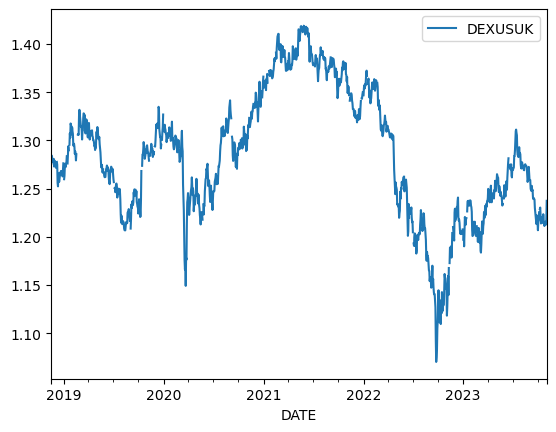

,DEXUSUK
count,1240.000000
mean,1.283908
std,0.066448
min,1.070300
25%,1.236800
50%,1.283650
75%,1.329150
max,1.418800


In [22]:
USUKrates.plot()
plt.show()
USUKrates.describe()

Data obtained like this is not necessarily 'clean'. For example, you see a few gaps/jumps in the plot above due to a few NaN's (not a number), presumably because data was not available on certain dates. Let's clean it up (remove the NaN's) and smooth it by computing a moving average (i.e. the average over $n$ consecutive data points).

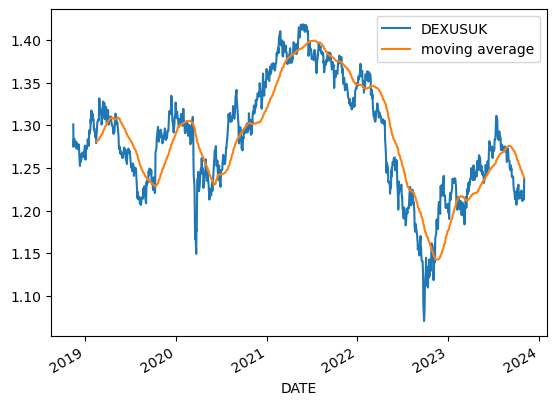

In [23]:
# Use .copy method to construct a copy of the DataFrame, then use .dropna method to remove NaN entries.
USUKratesClean=USUKrates.copy().dropna()
# Add Series 'moving average' to DataFrame.  
# Entries in this Series are defined by using the .rolling method to group entries into 60-day windows.
# .mean method is then used to compute averages of each of these 60-day windows.
USUKratesClean['moving average']=USUKratesClean['DEXUSUK'].rolling(window=60).mean()
# Plot data from DataFrame.
USUKratesClean.plot()
plt.show()

### Visualising Data in DataFrames

As we saw above, DataFrames are essentially two-dimensional spreadsheets, just as in Excel, i.e. they are arrays with row and column labels. 

Let's look at our example. We use `.head` and `.tail` to look at the beginning and end of the DataFrame. (Note that `.tail` conveniently prints out the column labels.)

In [24]:
print(USUKratesClean.head())
print()
print(USUKratesClean.tail())

            DEXUSUK  moving average
DATE                               
2018-11-14   1.3011             NaN
2018-11-15   1.2749             NaN
2018-11-16   1.2839             NaN
2018-11-19   1.2842             NaN
2018-11-20   1.2809             NaN

            DEXUSUK  moving average
DATE                               
2023-10-30   1.2157        1.242077
2023-10-31   1.2135        1.241010
2023-11-01   1.2127        1.239940
2023-11-02   1.2175        1.239017
2023-11-03   1.2374        1.238448


We already encountered `.describe()` above. But now we have two data columns.

In [25]:
print(USUKratesClean.describe())

           DEXUSUK  moving average
count  1240.000000     1181.000000
mean      1.283908        1.285525
std       0.066448        0.063551
min       1.070300        1.142170
25%       1.236800        1.241392
50%       1.283650        1.282203
75%       1.329150        1.338998
max       1.418800        1.399647


Let's look at the column and row labels. The methods `.columns` and `.index` give out these labels and also provide other detailed information.

In [26]:
print(USUKratesClean.columns)

Index(['DEXUSUK', 'moving average'], dtype='object')


In [27]:
print(USUKratesClean.index)

DatetimeIndex(['2018-11-14', '2018-11-15', '2018-11-16', '2018-11-19',
               '2018-11-20', '2018-11-21', '2018-11-23', '2018-11-26',
               '2018-11-27', '2018-11-28',
               ...
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03'],
              dtype='datetime64[ns]', name='DATE', length=1240, freq=None)


### Analysing Currency Exchange Data

We can use Pandas to analyse the long-term trends of this data, but unfortunately, the FRED data has a default time frame of five years.  If we want another starting date, we need to change it by hand, using `start=datetime(year,month,day)`. Another imported module, I'm afraid.

            DEXUSUK
DATE               
1990-01-01      NaN
1990-01-02   1.6110
1990-01-03   1.6100
1990-01-04   1.6293
1990-01-05   1.6370

            DEXUSUK
DATE               
2023-10-30   1.2157
2023-10-31   1.2135
2023-11-01   1.2127
2023-11-02   1.2175
2023-11-03   1.2374


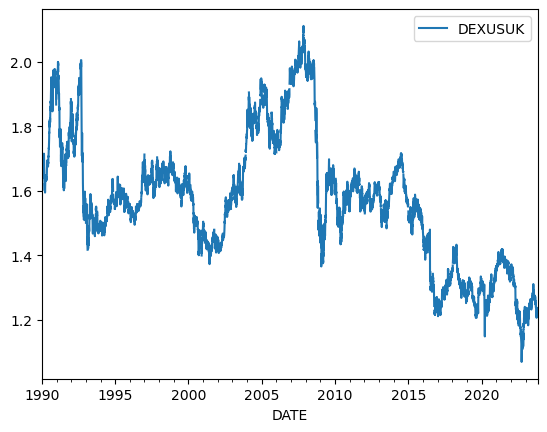

In [28]:
from datetime import datetime
currency_rates=web.DataReader('DEXUSUK', 'fred',start=datetime(1990,1,1))
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

Let's load the USDEUR and the JPYUSD exchange rate as well, but restrict to the last 10 years only.

            DEXUSEU  DEXUSUK  DEXJPUS
DATE                                 
2010-01-01      NaN      NaN      NaN
2010-01-04   1.4419   1.6109    92.55
2010-01-05   1.4402   1.6009    91.48
2010-01-06   1.4404   1.6016    92.53
2010-01-07   1.4314   1.5912    93.31

            DEXUSEU  DEXUSUK  DEXJPUS
DATE                                 
2023-10-30   1.0620   1.2157   149.01
2023-10-31   1.0568   1.2135   151.46
2023-11-01   1.0538   1.2127   150.96
2023-11-02   1.0618   1.2175   150.48
2023-11-03   1.0733   1.2374   149.36


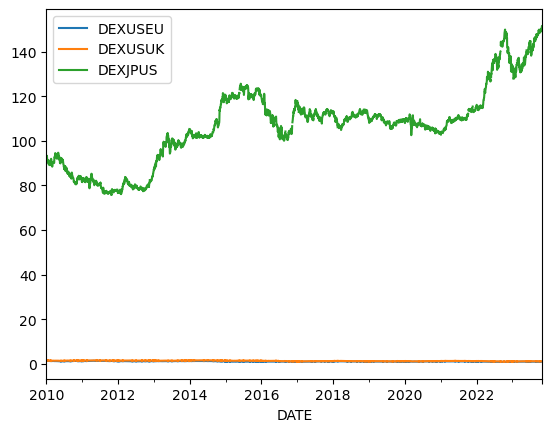

In [29]:
currency_rates=web.DataReader(['DEXUSEU','DEXUSUK','DEXJPUS'], 'fred',start=datetime(2010,1,1))
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

You see that the Yen exchange rate needs to be rescaled to provide meaningful plots.  We can do this by constructing a new column `DEXJPUS100` that is defined by multiplying the entries of the `DEXJPUS` column by $0.01$.

In [30]:
currency_rates['DEXJPUS100']=0.01*currency_rates['DEXJPUS']
print(currency_rates.head())
print()
print(currency_rates.tail())

            DEXUSEU  DEXUSUK  DEXJPUS  DEXJPUS100
DATE                                             
2010-01-01      NaN      NaN      NaN         NaN
2010-01-04   1.4419   1.6109    92.55      0.9255
2010-01-05   1.4402   1.6009    91.48      0.9148
2010-01-06   1.4404   1.6016    92.53      0.9253
2010-01-07   1.4314   1.5912    93.31      0.9331

            DEXUSEU  DEXUSUK  DEXJPUS  DEXJPUS100
DATE                                             
2023-10-30   1.0620   1.2157   149.01      1.4901
2023-10-31   1.0568   1.2135   151.46      1.5146
2023-11-01   1.0538   1.2127   150.96      1.5096
2023-11-02   1.0618   1.2175   150.48      1.5048
2023-11-03   1.0733   1.2374   149.36      1.4936


We will again use the `.drop` method to remove the now redundant `DEXJPUS` column.

            DEXUSEU  DEXUSUK  DEXJPUS100
DATE                                    
2010-01-01      NaN      NaN         NaN
2010-01-04   1.4419   1.6109      0.9255
2010-01-05   1.4402   1.6009      0.9148
2010-01-06   1.4404   1.6016      0.9253
2010-01-07   1.4314   1.5912      0.9331

            DEXUSEU  DEXUSUK  DEXJPUS100
DATE                                    
2023-10-30   1.0620   1.2157      1.4901
2023-10-31   1.0568   1.2135      1.5146
2023-11-01   1.0538   1.2127      1.5096
2023-11-02   1.0618   1.2175      1.5048
2023-11-03   1.0733   1.2374      1.4936


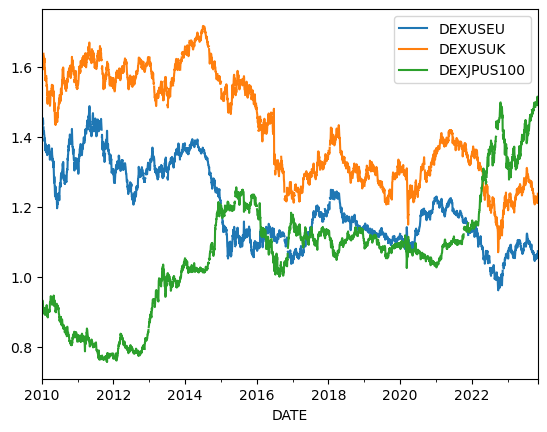

In [31]:
currency_rates=currency_rates.drop(columns='DEXJPUS')
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

As we may be most interested in GBP, let's convert to GBP-based exchange rates.

                UKUS      UKEU   UKJP100
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04  0.620771  0.895090  0.670741
2010-01-05  0.624649  0.899619  0.682825
2010-01-06  0.624376  0.899351  0.674782
2010-01-07  0.628457  0.899573  0.673515

                UKUS      UKEU   UKJP100
DATE                                    
2023-10-30  0.822571  0.873571  0.552024
2023-10-31  0.824063  0.870869  0.544079
2023-11-01  0.824606  0.868970  0.546242
2023-11-02  0.821355  0.872115  0.545824
2023-11-03  0.808146  0.867383  0.541073


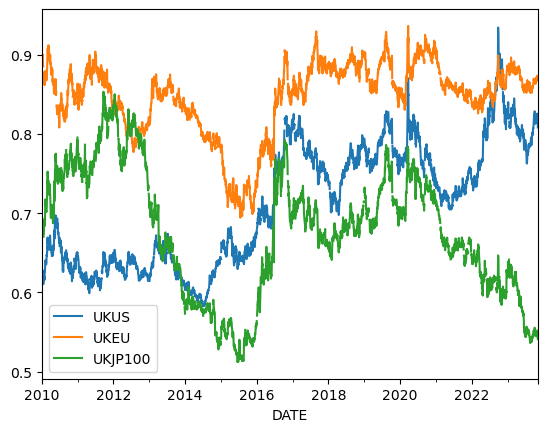

In [32]:
currency_rates['UKUS']=1/currency_rates['DEXUSUK']
currency_rates['UKEU']=currency_rates['UKUS']*currency_rates['DEXUSEU']
currency_rates['UKJP100']=currency_rates['UKUS']/currency_rates['DEXJPUS100']
currency_rates=currency_rates.drop(columns=['DEXJPUS100','DEXUSEU','DEXUSUK'])
print(currency_rates.head())
print()
print(currency_rates.tail())
currency_rates.plot()
plt.show()

This example shows that it's not only possible to multiply/divide columns by some fixed constant, but to multiply/divide columns by each other.

### Currency returns

There are some trends visible, but things become more interesting if we look at a different quantity. Let's define *raw currency returns* as the relative gain $(S_t-S_{t-1})/S_{t-1}$. This is built into dataframes as `.pct_change`.

                UKUS      UKEU   UKJP100
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04       NaN       NaN       NaN
2010-01-05  0.006246  0.005060  0.018016
2010-01-06 -0.000437 -0.000298 -0.011780
2010-01-07  0.006536  0.000247 -0.001878

                UKUS      UKEU   UKJP100
DATE                                    
2023-10-30 -0.000494  0.002149  0.003464
2023-10-31  0.001813 -0.003092 -0.014392
2023-11-01  0.000660 -0.002181  0.003974
2023-11-02 -0.003943  0.003619 -0.000765
2023-11-03 -0.016082 -0.005426 -0.008704


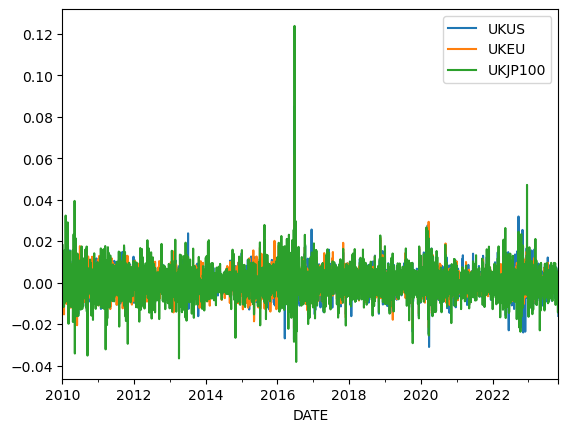

In [33]:
currency_returns=currency_rates.pct_change()
print(currency_returns.head())
print()
print(currency_returns.tail())
currency_returns.plot()
plt.show()

We easily see that there is an anomaly in the data around June 2016. 

We can zoom in on the relevant date range and draw our conclusions as to the effect of June 23rd, 2016, the day of the Brexit referendum.  To do this, we once again use the `.loc` method, and specify the rows of interest via slicing.

In [34]:
print(currency_returns.loc['2016-6-22':'2016-6-29'])

                UKUS      UKEU   UKJP100
DATE                                    
2016-06-22 -0.000954  0.001175 -0.000954
2016-06-23 -0.007973 -0.000326 -0.020526
2016-06-24  0.085124  0.061557  0.123749
2016-06-27  0.031929  0.022468  0.038019
2016-06-28 -0.005792 -0.003087 -0.015956
2016-06-29 -0.015988 -0.010380 -0.015701


Note that unlike list slicing, the upper entry indexed by the upper limit **is** included in the returned DataFrame.

So how are the currency returns correlated? We can easily visualise this using scatter plots.

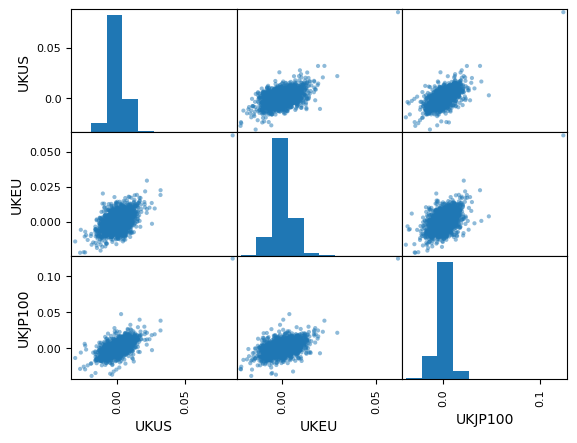

In [35]:
pd.plotting.scatter_matrix(currency_returns);
plt.show()

On the diagonal, the plots show the distribution of the three currency returns. The off-diagonal plots are scatter plots of the values of the respective currency returns. The outlier does distort the plot, so let's drop the data of June 24, 2016.

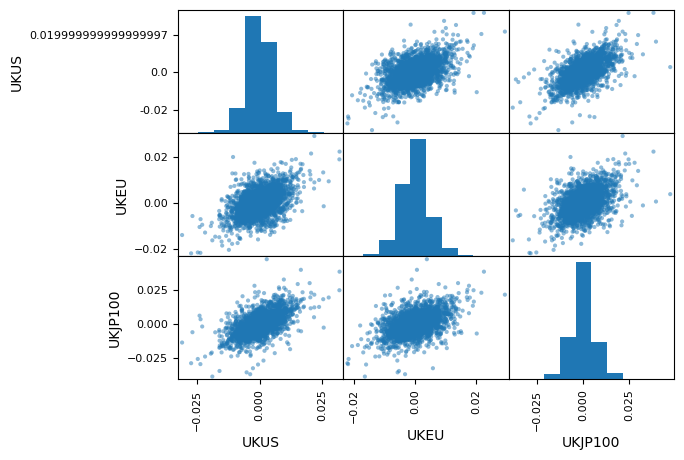

In [36]:
currency_returns_before=currency_returns.loc[:'2016-6-23']
currency_returns_after=currency_returns.loc['2016-6-27':]
currency_returns_cleaned=pd.concat([currency_returns_before,currency_returns_after])
pd.plotting.scatter_matrix(currency_returns_cleaned);
plt.show()

Removing the outlier seems to have been sensible. But is there a change before and after the date?

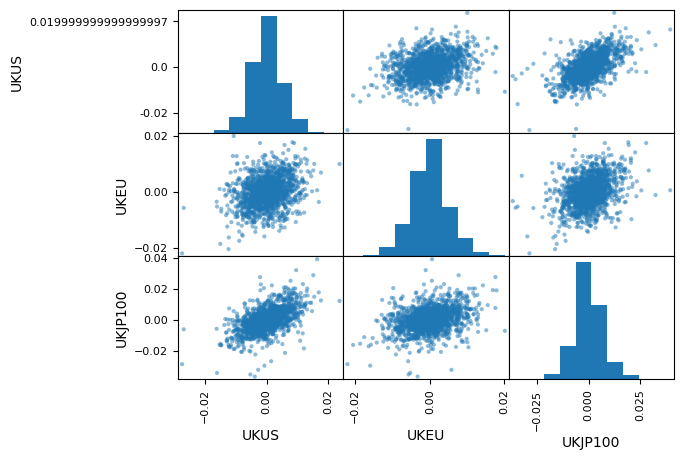

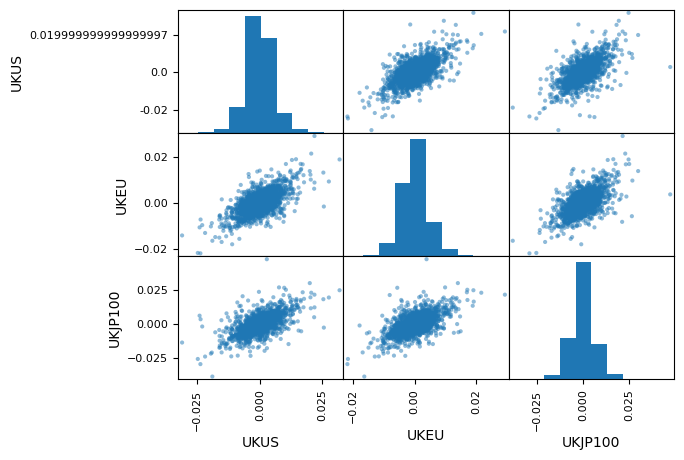

In [37]:
pd.plotting.scatter_matrix(currency_returns.loc[:'2016-6-23']);
plt.show()
print()
pd.plotting.scatter_matrix(currency_returns.loc['2016-6-28':]);
plt.show()

Is it significant? I am not a financial analyst, and I shall leave it up to you to come to your own conclusions.

### Seaborn Statistical Plots

I prefer to show you now a nice set of tools to provide an even nicer graphical representation of the data. The [Seaborn](http://seaborn.pydata.org/) library provides a high-level interface for drawing very attractive statistical graphics.

In [38]:
import seaborn as sns

```
Education is everything. 
We don't need little changes, we need gigantic, monumental changes. 
Schools should be palaces. 
The competition for the best teachers should be fierce.

             Samuel Norman Seaborn, The West Wing
```

As an example, let's focus on the GBPUSD and the GBPEUR exchange currency returns after June 23, 2016.

In [39]:
data=currency_returns[['UKUS','UKEU']].loc['2016-6-27':]
print(data.head())
print()
print(data.tail())

                UKUS      UKEU
DATE                          
2016-06-27  0.031929  0.022468
2016-06-28 -0.005792 -0.003087
2016-06-29 -0.015988 -0.010380
2016-06-30  0.020239  0.012438
2016-07-01 -0.002937  0.007276

                UKUS      UKEU
DATE                          
2023-10-30 -0.000494  0.002149
2023-10-31  0.001813 -0.003092
2023-11-01  0.000660 -0.002181
2023-11-02 -0.003943  0.003619
2023-11-03 -0.016082 -0.005426


Matplotlib of course offers histogram plotting:


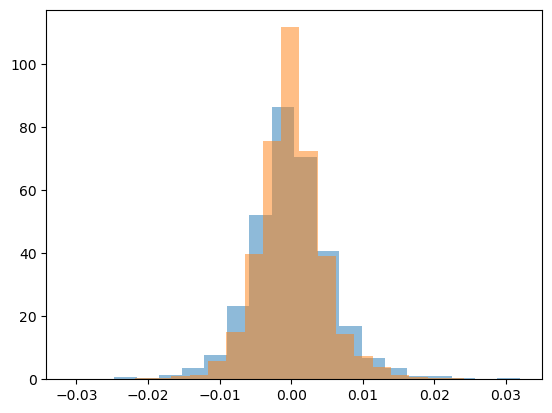

In [40]:
plt.hist(data['UKUS'], density=True, alpha=0.5, bins=20)
plt.hist(data['UKEU'], density=True, alpha=0.5, bins=20)
plt.show()

But let's compare this to seaborn output, which produces a smooth estimate of the distribution, using a "fancy" method called kernel density estimation (KDE).

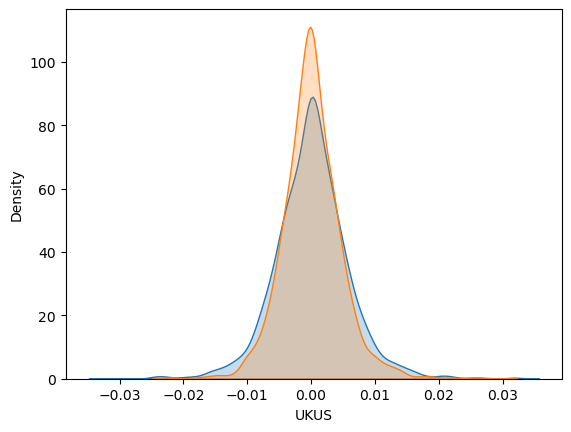

In [41]:
sns.kdeplot(data['UKUS'], fill=True)
sns.kdeplot(data['UKEU'], fill=True)
plt.show()

Histogram and KDE can be shown together.

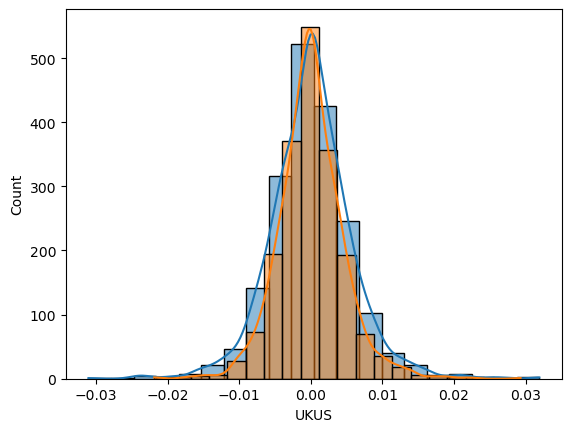

In [42]:
sns.histplot(data['UKUS'],kde=True, bins=20)
sns.histplot(data['UKEU'],kde=True, bins=20)
plt.show()

So what about the full two-dimensional data set? We have already encountered scatter plots from DataFrames.

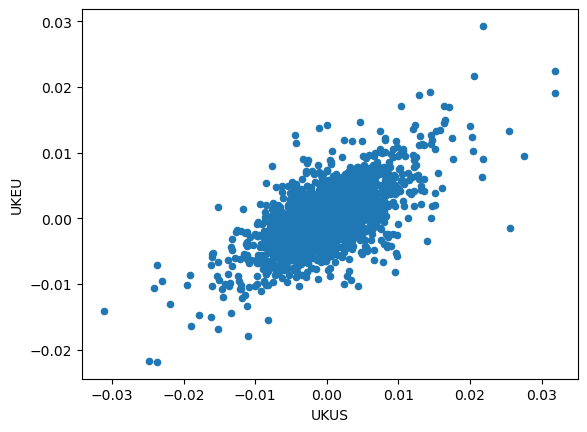

In [43]:
data.plot.scatter('UKUS','UKEU')
plt.show()

Seaborn produces contour plots of the joint density that are perhaps more informative.

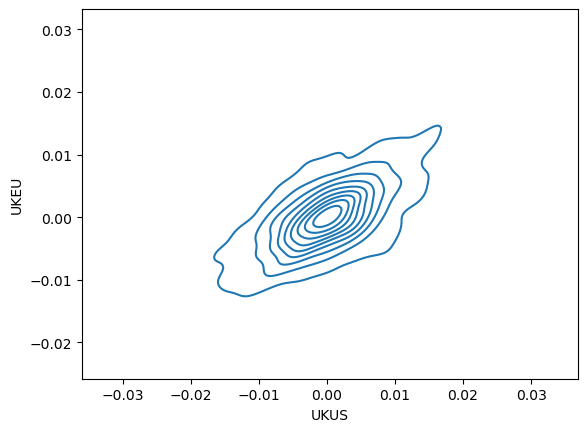

In [44]:
sns.kdeplot(data,x="UKUS",y="UKEU")
plt.show()

This can be combined with a plot of the individual (marginal) distributions.

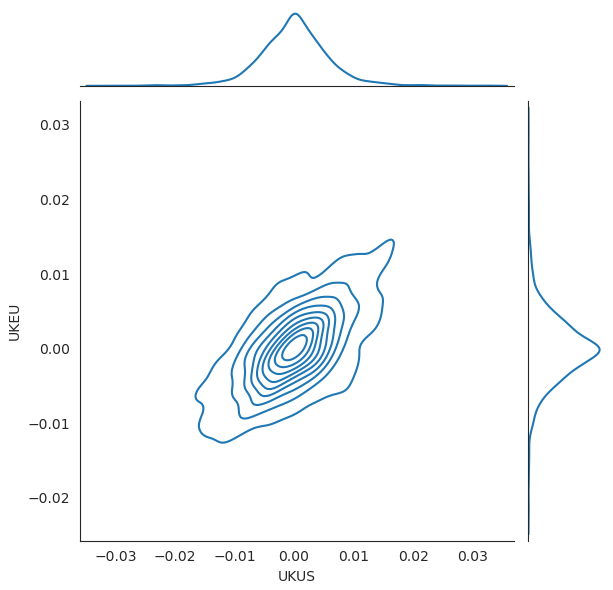

In [45]:
with sns.axes_style('white'):
    sns.jointplot(data,x="UKUS",y="UKEU",kind='kde');

And again, there are different options.

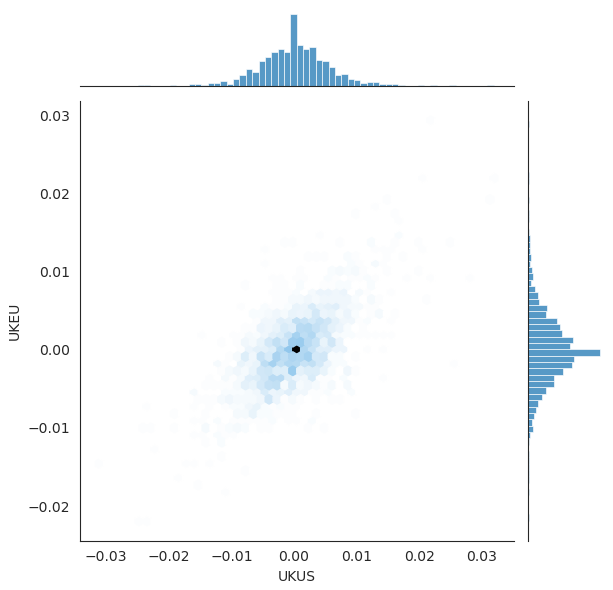

In [46]:
with sns.axes_style('white'):
    sns.jointplot(data,x="UKUS",y="UKEU",kind='hex');

Let's try some linear regression out of the box.

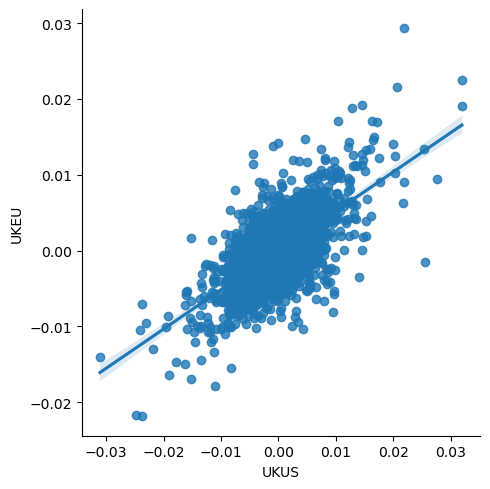

In [47]:
sns.lmplot(data,x="UKUS",y="UKEU");

So, are these two currency returns correlated? And did the Brexit referendum have any effect on this except for a two-day disruption? Let's add a flag to the data we have to distinguish between before and after Brexit.

In [48]:
currency_returns_before=currency_returns_before.assign(flag='before')
currency_returns_after=currency_returns_after.assign(flag='after')
currency_returns_cleaned=pd.concat([currency_returns_before,currency_returns_after])

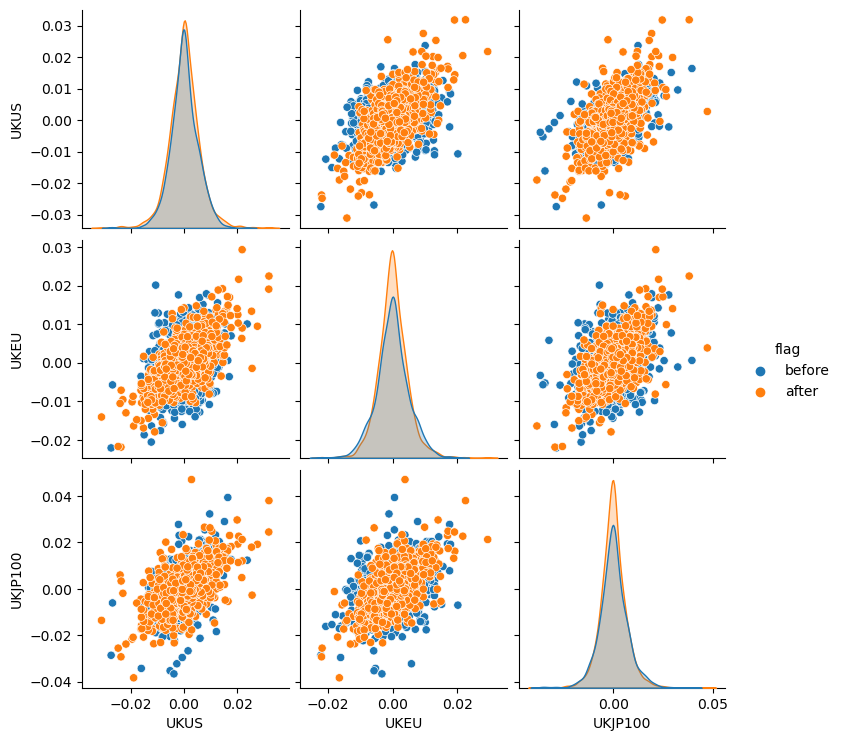

In [49]:
sns.pairplot(data=currency_returns_cleaned,hue="flag");

However, I'm just here to teach you Python. I'll leave any conclusions from the data analysis to you.

## Conclusion and Outlook

In this lecture we looked at Pandas in detail and showed how to use spreadsheets in Python.